# Imports

In [1]:
import pandas as pd
import glob
import numpy as np
from functools import reduce
import time
import datetime
import math
pd.set_option("display.max_columns", None)

# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Imports and upgrades for visualisation
import matplotlib.pyplot as plt
import seaborn as sns
!pip install seaborn --upgrade
!pip install matplotlib --upgrade

In [2]:
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

link = 'https://drive.google.com/file/d/18B4656TSdWoJfqP3LE56nrg7QyiMNmJR'

downloaded = drive.CreateFile({'id':'18B4656TSdWoJfqP3LE56nrg7QyiMNmJR'}) 
downloaded.GetContentFile('input.zip')

In [3]:
!unzip input.zip

Archive:  input.zip
   creating: input/
  inflating: input/maksuvolglaste_nimekiri.xlsx  
   creating: input/tasutud_maksud/
  inflating: input/tasutud_maksud/tasutud_maksud_2017_iii_kv.xlsx  
  inflating: input/tasutud_maksud/tasutud_maksud_2017_ii_kv.xlsx  
  inflating: input/tasutud_maksud/tasutud_maksud_2017_iv_kv.xlsx  
  inflating: input/tasutud_maksud/tasutud_maksud_2017_i_kv.xlsx  
  inflating: input/tasutud_maksud/tasutud_maksud_2018_iii_kvartal.xlsx  
  inflating: input/tasutud_maksud/tasutud_maksud_2018_ii_kvartal.xlsx  
  inflating: input/tasutud_maksud/tasutud_maksud_2018_iv_kvartal.xlsx  
  inflating: input/tasutud_maksud/tasutud_maksud_2018_i_kvartal.xlsx  
  inflating: input/tasutud_maksud/tasutud_maksud_2019_iii_kvartal.xlsx  
  inflating: input/tasutud_maksud/tasutud_maksud_2019_ii_kvartal.xlsx  
  inflating: input/tasutud_maksud/tasutud_maksud_2019_iv_kvartal.xlsx  
  inflating: input/tasutud_maksud/tasutud_maksud_2019_i_kvartal.xlsx  
  inflating: input/tasutud_maks

In [4]:
path = 'input/tasutud_maksud' # use your path
all_files = glob.glob(path + "/*.xlsx")
all_files.sort()

# Preprocess

In [5]:
def mod_df(path):
    file_name = path.split("/")[-1]
    file_name = file_name.split("\\")[-1]
    year = file_name.split("_")[2]
    quater = file_name.split("_")[3]

    suffix = "_{0}_{1}".format(year,quater)
    
    df = pd.read_excel(path,usecols=['Nimi', 'Registrikood','Riiklikud Maksud', 'Tööjõumaksud Ja Maksed', 'Kaive', 'Tootajaid' ], dtype={'Registrikood': str}) #nrows=1000
    #df['date'] = year
    #df['type'] = "fast_grower"
    df = df.rename(columns={'Nimi':"Nimi", 'Registrikood': "Registrikood", 'Riiklikud Maksud': 'Riiklikud Maksud'+suffix, 'Tööjõumaksud Ja Maksed': 'Tööjõumaksud Ja Maksed'+suffix, 'Kaive':'Kaive'+suffix, 'Tootajaid':'Tootajaid'+suffix,
                           "date": "date"+suffix, 'type':'type'+suffix})
    return df



In [6]:
#all_files = all_files[6:10] # remove this row later
df_from_each_file = (mod_df(f) for f in all_files)

df_merged = reduce(lambda  left,right: pd.concat([pd.merge(left,right,on=['Registrikood', 'Nimi'], #remove concat, if you want every company in 1 row
                                            how='outer'), right]), df_from_each_file)

df_merged = df_merged.drop_duplicates()
#result = df_merged.copy()

In [7]:
print(df_merged.shape)
print(df_merged.columns)
df_merged.sample(n = 3)

(2538009, 78)
Index(['Registrikood', 'Nimi', 'Riiklikud Maksud_2017_i',
       'Tööjõumaksud Ja Maksed_2017_i', 'Kaive_2017_i', 'Tootajaid_2017_i',
       'Riiklikud Maksud_2017_ii', 'Tööjõumaksud Ja Maksed_2017_ii',
       'Kaive_2017_ii', 'Tootajaid_2017_ii', 'Riiklikud Maksud_2017_iii',
       'Tööjõumaksud Ja Maksed_2017_iii', 'Kaive_2017_iii',
       'Tootajaid_2017_iii', 'Riiklikud Maksud_2017_iv',
       'Tööjõumaksud Ja Maksed_2017_iv', 'Kaive_2017_iv', 'Tootajaid_2017_iv',
       'Riiklikud Maksud_2018_i', 'Tööjõumaksud Ja Maksed_2018_i',
       'Kaive_2018_i', 'Tootajaid_2018_i', 'Riiklikud Maksud_2018_ii',
       'Tööjõumaksud Ja Maksed_2018_ii', 'Kaive_2018_ii', 'Tootajaid_2018_ii',
       'Riiklikud Maksud_2018_iii', 'Tööjõumaksud Ja Maksed_2018_iii',
       'Kaive_2018_iii', 'Tootajaid_2018_iii', 'Riiklikud Maksud_2018_iv',
       'Tööjõumaksud Ja Maksed_2018_iv', 'Kaive_2018_iv', 'Tootajaid_2018_iv',
       'Riiklikud Maksud_2019_i', 'Tööjõumaksud Ja Maksed_2019_i',
    

,Registrikood,Nimi,Riiklikud Maksud_2017_i,Tööjõumaksud Ja Maksed_2017_i,Kaive_2017_i,Tootajaid_2017_i,Riiklikud Maksud_2017_ii,Tööjõumaksud Ja Maksed_2017_ii,Kaive_2017_ii,Tootajaid_2017_ii,Riiklikud Maksud_2017_iii,Tööjõumaksud Ja Maksed_2017_iii,Kaive_2017_iii,Tootajaid_2017_iii,Riiklikud Maksud_2017_iv,Tööjõumaksud Ja Maksed_2017_iv,Kaive_2017_iv,Tootajaid_2017_iv,Riiklikud Maksud_2018_i,Tööjõumaksud Ja Maksed_2018_i,Kaive_2018_i,Tootajaid_2018_i,Riiklikud Maksud_2018_ii,Tööjõumaksud Ja Maksed_2018_ii,Kaive_2018_ii,Tootajaid_2018_ii,Riiklikud Maksud_2018_iii,Tööjõumaksud Ja Maksed_2018_iii,Kaive_2018_iii,Tootajaid_2018_iii,Riiklikud Maksud_2018_iv,Tööjõumaksud Ja Maksed_2018_iv,Kaive_2018_iv,Tootajaid_2018_iv,Riiklikud Maksud_2019_i,Tööjõumaksud Ja Maksed_2019_i,Kaive_2019_i,Tootajaid_2019_i,Riiklikud Maksud_2019_ii,Tööjõumaksud Ja Maksed_2019_ii,Kaive_2019_ii,Tootajaid_2019_ii,Riiklikud Maksud_2019_iii,Tööjõumaksud Ja Maksed_2019_iii,Kaive_2019_iii,Tootajaid_2019_iii,Riiklikud Maksud_2019_iv,Tööjõumaksud Ja Maksed_2019_iv,Kaive_2019_iv,Tootajaid_2019_iv,Riiklikud Maksud_2020_i,Tööjõumaksud Ja Maksed_2020_i,Kaive_2020_i,Tootajaid_2020_i,Riiklikud Maksud_2020_ii,Tööjõumaksud Ja Maksed_2020_ii,Kaive_2020_ii,Tootajaid_2020_ii,Riiklikud Maksud_2020_iii,Tööjõumaksud Ja Maksed_2020_iii,Kaive_2020_iii,Tootajaid_2020_iii,Riiklikud Maksud_2020_iv,Tööjõumaksud Ja Maksed_2020_iv,Kaive_2020_iv,Tootajaid_2020_iv,Riiklikud Maksud_2021_i,Tööjõumaksud Ja Maksed_2021_i,Kaive_2021_i,Tootajaid_2021_i,Riiklikud Maksud_2021_ii,Tööjõumaksud Ja Maksed_2021_ii,Kaive_2021_ii,Tootajaid_2021_ii,Riiklikud Maksud_2021_iii,Tööjõumaksud Ja Maksed_2021_iii,Kaive_2021_iii,Tootajaid_2021_iii
948462,12178985,"WORKSERVICE EHITUS, OÜ",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7400.29,2361.82,18098.65,4.0,2283.89,972.9,10243.00,2.0,2474.20,374.0,14248.40,2.0,2236.81,211.26,12446.60,1.0,229.83,229.83,0.00,2.0,263.83,300.10,0.00,2.0,20.44,0.00,0.00,NaN,25.50,0.00,0.00,NaN,5.62,0.00,0.00,NaN,144.10,0.0,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN
847265,11995256,"BUILDERS INC, OÜ",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,576.98,626.35,0.00,2.0,578.16,585.26,0.00,1.0
1282188,12787235,"NORDMEDICAL, OÜ",NaN,NaN,NaN,NaN,1255.15,0.0,14792.88,NaN,1729.95,0.0,37446.97,NaN,1774.62,0.0,20501.83,NaN,3631.88,0.00,32523.90,NaN,1050.37,0.0,17266.85,NaN,3173.25,0.0,32870.13,NaN,3463.94,0.00,41868.17,NaN,5647.23,0.00,52240.92,NaN,2636.06,161.66,26122.32,1.0,3920.09,802.44,23051.21,1.0,4153.17,802.44,31155.99,NaN,3318.88,251.97,50755.21,NaN,1760.83,0.0,11639.39,NaN,2785.15,0.0,29751.88,NaN,2353.95,0.0,37536.04,NaN,2541.8,0.0,40301.87,NaN,446.22,0.00,27544.27,NaN,1101.28,0.00,9455.18,NaN


In [8]:
df_merged.loc[df_merged['Registrikood'] == '14339972']

,Registrikood,Nimi,Riiklikud Maksud_2017_i,Tööjõumaksud Ja Maksed_2017_i,Kaive_2017_i,Tootajaid_2017_i,Riiklikud Maksud_2017_ii,Tööjõumaksud Ja Maksed_2017_ii,Kaive_2017_ii,Tootajaid_2017_ii,Riiklikud Maksud_2017_iii,Tööjõumaksud Ja Maksed_2017_iii,Kaive_2017_iii,Tootajaid_2017_iii,Riiklikud Maksud_2017_iv,Tööjõumaksud Ja Maksed_2017_iv,Kaive_2017_iv,Tootajaid_2017_iv,Riiklikud Maksud_2018_i,Tööjõumaksud Ja Maksed_2018_i,Kaive_2018_i,Tootajaid_2018_i,Riiklikud Maksud_2018_ii,Tööjõumaksud Ja Maksed_2018_ii,Kaive_2018_ii,Tootajaid_2018_ii,Riiklikud Maksud_2018_iii,Tööjõumaksud Ja Maksed_2018_iii,Kaive_2018_iii,Tootajaid_2018_iii,Riiklikud Maksud_2018_iv,Tööjõumaksud Ja Maksed_2018_iv,Kaive_2018_iv,Tootajaid_2018_iv,Riiklikud Maksud_2019_i,Tööjõumaksud Ja Maksed_2019_i,Kaive_2019_i,Tootajaid_2019_i,Riiklikud Maksud_2019_ii,Tööjõumaksud Ja Maksed_2019_ii,Kaive_2019_ii,Tootajaid_2019_ii,Riiklikud Maksud_2019_iii,Tööjõumaksud Ja Maksed_2019_iii,Kaive_2019_iii,Tootajaid_2019_iii,Riiklikud Maksud_2019_iv,Tööjõumaksud Ja Maksed_2019_iv,Kaive_2019_iv,Tootajaid_2019_iv,Riiklikud Maksud_2020_i,Tööjõumaksud Ja Maksed_2020_i,Kaive_2020_i,Tootajaid_2020_i,Riiklikud Maksud_2020_ii,Tööjõumaksud Ja Maksed_2020_ii,Kaive_2020_ii,Tootajaid_2020_ii,Riiklikud Maksud_2020_iii,Tööjõumaksud Ja Maksed_2020_iii,Kaive_2020_iii,Tootajaid_2020_iii,Riiklikud Maksud_2020_iv,Tööjõumaksud Ja Maksed_2020_iv,Kaive_2020_iv,Tootajaid_2020_iv,Riiklikud Maksud_2021_i,Tööjõumaksud Ja Maksed_2021_i,Kaive_2021_i,Tootajaid_2021_i,Riiklikud Maksud_2021_ii,Tööjõumaksud Ja Maksed_2021_ii,Kaive_2021_ii,Tootajaid_2021_ii,Riiklikud Maksud_2021_iii,Tööjõumaksud Ja Maksed_2021_iii,Kaive_2021_iii,Tootajaid_2021_iii
1905164,14339972,TAXIFY ESTONIA OÜ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,97414.16,NaN,7937.0,0.0,195359.07,NaN,8407.35,0.0,188152.72,NaN,12015.54,0.0,198880.19,NaN,14888.84,0.0,203471.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1905166,14339972,TAXIFY ESTONIA OÜ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97414.16,NaN,7937.0,0.0,195359.07,NaN,8407.35,0.0,188152.72,NaN,12015.54,0.0,198880.19,NaN,14888.84,0.0,203471.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1905167,14339972,TAXIFY ESTONIA OÜ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7937.0,0.0,195359.07,NaN,8407.35,0.0,188152.72,NaN,12015.54,0.0,198880.19,NaN,14888.84,0.0,203471.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1905168,14339972,TAXIFY ESTONIA OÜ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8407.35,0.0,188152.72,NaN,12015.54,0.0,198880.19,NaN,14888.84,0.0,203471.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1905169,14339972,TAXIFY ESTONIA OÜ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12015.54,0.0,198880.19,NaN,14888.84,0.0,203471.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1905170,14339972,TAXIFY ESTONIA OÜ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14888.84,0.0,203471.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2275724,14339972,BOLT SERVICES EE OÜ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [9]:
debtors_df = pd.read_excel('input/maksuvolglaste_nimekiri.xlsx', dtype={'Kood': str})
debtors_df = debtors_df.drop(['Nimi'], axis=1)
reg_df = pd.read_excel('input/Ъksuste nimekiri 01.12.2020_revid.4.10.2021.xlsx', dtype={'Registrikood': str})
reg_df = reg_df.drop(['Nimi'], axis=1)

result = pd.merge(df_merged,debtors_df,left_on=['Registrikood'],right_on=['Kood'], how='left')
result = pd.merge(result,reg_df,on=['Registrikood'], how='left')

# drop rows, where company created is before 2015
result = result[result['Üksuse registreerimise kuupäev'] >= pd.Timestamp('2015-01-01')]

Pankrotis/likvideeritud:

In [10]:
# pankrotis: 
condition = list(map(result['Nimi'].str.contains, ['(PANKROTIS)']))

result['pankrotis'] = np.select(condition, [1], 0)
print(result['pankrotis'].value_counts())

/usr/local/lib/python3.7/dist-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


0    631226
1       409
Name: pankrotis, dtype: int64


In [11]:
# likvideeritud: 
condition = list(map(result['Nimi'].str.contains, ['(LIKVIDEERIMISEL)']))

result['likvideeritud'] = np.select(condition, [1], 0)
print(result['likvideeritud'].value_counts())

/usr/local/lib/python3.7/dist-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


0    629611
1      2024
Name: likvideeritud, dtype: int64


In [12]:
result.head()

,Registrikood,Nimi,Riiklikud Maksud_2017_i,Tööjõumaksud Ja Maksed_2017_i,Kaive_2017_i,Tootajaid_2017_i,Riiklikud Maksud_2017_ii,Tööjõumaksud Ja Maksed_2017_ii,Kaive_2017_ii,Tootajaid_2017_ii,Riiklikud Maksud_2017_iii,Tööjõumaksud Ja Maksed_2017_iii,Kaive_2017_iii,Tootajaid_2017_iii,Riiklikud Maksud_2017_iv,Tööjõumaksud Ja Maksed_2017_iv,Kaive_2017_iv,Tootajaid_2017_iv,Riiklikud Maksud_2018_i,Tööjõumaksud Ja Maksed_2018_i,Kaive_2018_i,Tootajaid_2018_i,Riiklikud Maksud_2018_ii,Tööjõumaksud Ja Maksed_2018_ii,Kaive_2018_ii,Tootajaid_2018_ii,Riiklikud Maksud_2018_iii,Tööjõumaksud Ja Maksed_2018_iii,Kaive_2018_iii,Tootajaid_2018_iii,Riiklikud Maksud_2018_iv,Tööjõumaksud Ja Maksed_2018_iv,Kaive_2018_iv,Tootajaid_2018_iv,Riiklikud Maksud_2019_i,Tööjõumaksud Ja Maksed_2019_i,Kaive_2019_i,Tootajaid_2019_i,Riiklikud Maksud_2019_ii,Tööjõumaksud Ja Maksed_2019_ii,Kaive_2019_ii,Tootajaid_2019_ii,Riiklikud Maksud_2019_iii,Tööjõumaksud Ja Maksed_2019_iii,Kaive_2019_iii,Tootajaid_2019_iii,Riiklikud Maksud_2019_iv,Tööjõumaksud Ja Maksed_2019_iv,Kaive_2019_iv,Tootajaid_2019_iv,Riiklikud Maksud_2020_i,Tööjõumaksud Ja Maksed_2020_i,Kaive_2020_i,Tootajaid_2020_i,Riiklikud Maksud_2020_ii,Tööjõumaksud Ja Maksed_2020_ii,Kaive_2020_ii,Tootajaid_2020_ii,Riiklikud Maksud_2020_iii,Tööjõumaksud Ja Maksed_2020_iii,Kaive_2020_iii,Tootajaid_2020_iii,Riiklikud Maksud_2020_iv,Tööjõumaksud Ja Maksed_2020_iv,Kaive_2020_iv,Tootajaid_2020_iv,Riiklikud Maksud_2021_i,Tööjõumaksud Ja Maksed_2021_i,Kaive_2021_i,Tootajaid_2021_i,Riiklikud Maksud_2021_ii,Tööjõumaksud Ja Maksed_2021_ii,Kaive_2021_ii,Tootajaid_2021_ii,Riiklikud Maksud_2021_iii,Tööjõumaksud Ja Maksed_2021_iii,Kaive_2021_iii,Tootajaid_2021_iii,Kood,Maksuvõlg,Sh vaidlustatud,Maksuvõlg alates,EMTAK2008 Tähtkoodiga valdkond,EMTAK2008 4-kohaline kood,Institutsionaalsete sektorite Eesti jaoks kohandatud klassifikaator 2010,Kliendi/emitendi identifikaator (vastavalt Eesti Panga presidendi 29. mai määrusele nr 7),Üksuse registreerimise kuupäev,Üksuse registrist kustutamise kuupäev,Muudatuse või lisamise kuupäev,pankrotis,likvideeritud
1273299,12775738,KJ PAIGALDUS OÜ,NaN,NaN,0.0,NaN,129.27,0.0,1272.67,NaN,645.25,122.45,3464.0,NaN,447.04,452.02,2773.0,NaN,38.56,0.0,316.0,NaN,760.45,340.97,5099.5,2.0,6872.86,2824.38,25220.0,1.0,3527.96,2160.2,11506.5,1.0,2141.69,1837.38,4983.77,1.0,2120.43,1046.94,9887.57,1.0,4743.28,1782.66,22119.0,1.0,5627.06,3838.33,18203.02,1.0,3371.63,2294.19,10471.0,1.0,1028.14,525.98,5146.2,1.0,1511.23,889.48,8355.99,1.0,2542.32,1462.39,12033.95,1.0,1735.25,1396.4,8511.1,2.0,3308.35,2556.72,10930.91,2.0,6774.56,3488.56,24875.35,2.0,NaN,NaN,NaN,NaT,F,4329.0,S11002-S11003,8.0,2015-01-02,NaT,NaT,0,0
1273300,12775738,KJ PAIGALDUS OÜ,NaN,NaN,NaN,NaN,129.27,0.0,1272.67,NaN,645.25,122.45,3464.0,NaN,447.04,452.02,2773.0,NaN,38.56,0.0,316.0,NaN,760.45,340.97,5099.5,2.0,6872.86,2824.38,25220.0,1.0,3527.96,2160.2,11506.5,1.0,2141.69,1837.38,4983.77,1.0,2120.43,1046.94,9887.57,1.0,4743.28,1782.66,22119.0,1.0,5627.06,3838.33,18203.02,1.0,3371.63,2294.19,10471.0,1.0,1028.14,525.98,5146.2,1.0,1511.23,889.48,8355.99,1.0,2542.32,1462.39,12033.95,1.0,1735.25,1396.4,8511.1,2.0,3308.35,2556.72,10930.91,2.0,6774.56,3488.56,24875.35,2.0,NaN,NaN,NaN,NaT,F,4329.0,S11002-S11003,8.0,2015-01-02,NaT,NaT,0,0
1273301,12775738,KJ PAIGALDUS OÜ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,645.25,122.45,3464.0,NaN,447.04,452.02,2773.0,NaN,38.56,0.0,316.0,NaN,760.45,340.97,5099.5,2.0,6872.86,2824.38,25220.0,1.0,3527.96,2160.2,11506.5,1.0,2141.69,1837.38,4983.77,1.0,2120.43,1046.94,9887.57,1.0,4743.28,1782.66,22119.0,1.0,5627.06,3838.33,18203.02,1.0,3371.63,2294.19,10471.0,1.0,1028.14,525.98,5146.2,1.0,1511.23,889.48,8355.99,1.0,2542.32,1462.39,12033.95,1.0,1735.25,1396.4,8511.1,2.0,3308.35,2556.72,10930.91,2.0,6774.56,3488.56,24875.35,2.0,NaN,NaN,NaN,NaT,F,4329.0,S11002-S11003,8.0,2015-01-02,NaT,NaT,0,0
1273302,12775738,KJ PAIGALDUS OÜ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,447.04,452.02,2773.0,NaN,38.56,0.0,316.0,NaN,760.45,340.97

Labelling formula(s):

In [13]:
# Average Increase:
def averageIncrease(list):
  changes = []
  for x1, x2 in zip(list[:-1], list[1:]):
      try:
          pct = (x2 - x1) * 100 / x1
      except ZeroDivisionError:
          pct = 0
      changes.append(pct)
  if len(changes) == 0:
    return 0
  avg = sum(changes)/len(changes)
  return avg

In [14]:
# Compound Monthly Growth Rate - https://amplitude.com/blog/month-over-month-growth-rates
def CMGR(list):
  if (len(list) is 0):
    return 0
  return ((((list[len(list) - 1]/list[0]) ** (1/len(list))) - 1) * 100).real

In [15]:
label_calc = result.filter(regex=("Kaive_.*"))
#label_calc['label'] = label_calc.apply(lambda x: x[0],axis=1)
label_calc['kaive_list'] = label_calc.values.tolist()
#remove nan values from list
label_calc['kaive_list'] = label_calc['kaive_list'].apply(lambda asd: [x for x in asd if math.isnan(x) == False and x != 0.0])
label_calc['averageIncrease'] = label_calc['kaive_list'].apply(lambda asd: averageIncrease(asd))
label_calc['compoundMonthlyGrowthRate'] = label_calc['kaive_list'].apply(lambda asd: CMGR(asd))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [16]:
result = pd.concat([result, label_calc['averageIncrease']], axis=1)
result = pd.concat([result, label_calc['compoundMonthlyGrowthRate']], axis=1)
result['label_avg'] = result['averageIncrease'].apply(lambda x: 'not fast-growing' if x <= 30 else 'fast-growing')
result['label'] = result['compoundMonthlyGrowthRate'].apply(lambda x: 'not fast-growing' if x <= 30 else 'fast-growing')

In [17]:
result['label_avg'].value_counts()

not fast-growing    452708
fast-growing        178927
Name: label_avg, dtype: int64

In [18]:
result['label'].value_counts()

not fast-growing    579720
fast-growing         51915
Name: label, dtype: int64

In [19]:
#print(unique_registrikoodid.shape)


In [20]:
print(result.shape)


(631635, 95)


Train, test, val stuff:⏰☹⛪


In [21]:
# Find unique codes:
all_registrikoodid = result[['Registrikood']].values.ravel()
unique_registrikoodid =  pd.unique(all_registrikoodid)
#print(unique_registrikoodid)

# How many lines before duplicating rows:
original_data_len = len(unique_registrikoodid)

# Create test, train, val indexes:
train_data_indx = [0] * int(original_data_len * 0.6)
test_data_indx = [1] * int(original_data_len * 0.2)
val_data_indx= [2] * int(original_data_len * 0.2)

# Sum indexes and shuffle:
split_indx_array = train_data_indx + test_data_indx + val_data_indx
np.random.seed(42)
np.random.shuffle(split_indx_array)
#print(split_indx_array)

# make sure unique_registrikoodid is the same length as split_indx_array:
unique_registrikoodid = unique_registrikoodid[:len(split_indx_array)]

# Merge codes and test, train, val indexes:
d = {'Registrikoodid': unique_registrikoodid, 'Train_test_val': split_indx_array}
split_df = pd.DataFrame(data=d)

# Merge split_indx_array to original df:
result2 = pd.merge(result, split_df ,left_on=['Registrikood'], right_on=['Registrikoodid'], how='left')

# Convert categorical variables to binary:
result2 = pd.get_dummies(result2, columns = ['EMTAK2008 Tähtkoodiga valdkond', 'Institutsionaalsete sektorite Eesti jaoks kohandatud klassifikaator 2010'])

# Drop certain columns that models don't use and fill NAs:
result2 = result2.drop(columns=['Nimi','Üksuse registreerimise kuupäev','Registrikood', 'Registrikoodid', 'Kood', 'Sh vaidlustatud', 'Maksuvõlg alates', 'Muudatuse või lisamise kuupäev','Üksuse registrist kustutamise kuupäev', 'averageIncrease', 'compoundMonthlyGrowthRate', 'label_avg'])
result2 = result2.fillna(0)

# Create dataframes (test, train, val):
train_data = result2.loc[result2['Train_test_val'] == 0]
test_data = result2.loc[result2['Train_test_val'] == 1]
val_data = result2.loc[result2['Train_test_val'] == 2]

# Create labels:
train_data_labels = train_data['label'].replace('fast-growing', 1).replace('not fast-growing', 0)
test_data_labels = test_data['label'].replace('fast-growing', 1).replace('not fast-growing', 0)
val_data_labels = val_data['label'].replace('fast-growing', 1).replace('not fast-growing', 0)

train_data = train_data.drop(columns=['label' , 'Train_test_val'])
test_data = test_data.drop(columns=['label' , 'Train_test_val'])
val_data = val_data.drop(columns=['label' , 'Train_test_val'])


In [22]:
train_data.shape

(378936, 111)

In [23]:
test_data.head(3)

,Riiklikud Maksud_2017_i,Tööjõumaksud Ja Maksed_2017_i,Kaive_2017_i,Tootajaid_2017_i,Riiklikud Maksud_2017_ii,Tööjõumaksud Ja Maksed_2017_ii,Kaive_2017_ii,Tootajaid_2017_ii,Riiklikud Maksud_2017_iii,Tööjõumaksud Ja Maksed_2017_iii,Kaive_2017_iii,Tootajaid_2017_iii,Riiklikud Maksud_2017_iv,Tööjõumaksud Ja Maksed_2017_iv,Kaive_2017_iv,Tootajaid_2017_iv,Riiklikud Maksud_2018_i,Tööjõumaksud Ja Maksed_2018_i,Kaive_2018_i,Tootajaid_2018_i,Riiklikud Maksud_2018_ii,Tööjõumaksud Ja Maksed_2018_ii,Kaive_2018_ii,Tootajaid_2018_ii,Riiklikud Maksud_2018_iii,Tööjõumaksud Ja Maksed_2018_iii,Kaive_2018_iii,Tootajaid_2018_iii,Riiklikud Maksud_2018_iv,Tööjõumaksud Ja Maksed_2018_iv,Kaive_2018_iv,Tootajaid_2018_iv,Riiklikud Maksud_2019_i,Tööjõumaksud Ja Maksed_2019_i,Kaive_2019_i,Tootajaid_2019_i,Riiklikud Maksud_2019_ii,Tööjõumaksud Ja Maksed_2019_ii,Kaive_2019_ii,Tootajaid_2019_ii,Riiklikud Maksud_2019_iii,Tööjõumaksud Ja Maksed_2019_iii,Kaive_2019_iii,Tootajaid_2019_iii,Riiklikud Maksud_2019_iv,Tööjõumaksud Ja Maksed_2019_iv,Kaive_2019_iv,Tootajaid_2019_iv,Riiklikud Maksud_2020_i,Tööjõumaksud Ja Maksed_2020_i,Kaive_2020_i,Tootajaid_2020_i,Riiklikud Maksud_2020_ii,Tööjõumaksud Ja Maksed_2020_ii,Kaive_2020_ii,Tootajaid_2020_ii,Riiklikud Maksud_2020_iii,Tööjõumaksud Ja Maksed_2020_iii,Kaive_2020_iii,Tootajaid_2020_iii,Riiklikud Maksud_2020_iv,Tööjõumaksud Ja Maksed_2020_iv,Kaive_2020_iv,Tootajaid_2020_iv,Riiklikud Maksud_2021_i,Tööjõumaksud Ja Maksed_2021_i,Kaive_2021_i,Tootajaid_2021_i,Riiklikud Maksud_2021_ii,Tööjõumaksud Ja Maksed_2021_ii,Kaive_2021_ii,Tootajaid_2021_ii,Riiklikud Maksud_2021_iii,Tööjõumaksud Ja Maksed_2021_iii,Kaive_2021_iii,Tootajaid_2021_iii,Maksuvõlg,EMTAK2008 4-kohaline kood,Kliendi/emitendi identifikaator (vastavalt Eesti Panga presidendi 29. mai määrusele nr 7),pankrotis,likvideeritud,EMTAK2008 Tähtkoodiga valdkond_A,EMTAK2008 Tähtkoodiga valdkond_B,EMTAK2008 Tähtkoodiga valdkond_C,EMTAK2008 Tähtkoodiga valdkond_D,EMTAK2008 Tähtkoodiga valdkond_E,EMTAK2008 Tähtkoodiga valdkond_F,EMTAK2008 Tähtkoodiga valdkond_G,EMTAK2008 Tähtkoodiga valdkond_H,EMTAK2008 Tähtkoodiga valdkond_I,EMTAK2008 Tähtkoodiga valdkond_J,EMTAK2008 Tähtkoodiga valdkond_K,EMTAK2008 Tähtkoodiga valdkond_L,EMTAK2008 Tähtkoodiga valdkond_M,EMTAK2008 Tähtkoodiga valdkond_N,EMTAK2008 Tähtkoodiga valdkond_O,EMTAK2008 Tähtkoodiga valdkond_P,EMTAK2008 Tähtkoodiga valdkond_Q,EMTAK2008 Tähtkoodiga valdkond_R,EMTAK2008 Tähtkoodiga valdkond_S,Institutsionaalsete sektorite Eesti jaoks kohandatud klassifikaator 2010_S11001,Institutsionaalsete sektorite Eesti jaoks kohandatud klassifikaator 2010_S11002-S11003,Institutsionaalsete sektorite Eesti jaoks kohandatud klassifikaator 2010_S122,Institutsionaalsete sektorite Eesti jaoks kohandatud klassifikaator 2010_S124,Institutsionaalsete sektorite Eesti jaoks kohandatud klassifikaator 2010_S125,Institutsionaalsete sektorite Eesti jaoks kohandatud klassifikaator 2010_S126,Institutsionaalsete sektorite Eesti jaoks kohandatud klassifikaator 2010_S127,Institutsionaalsete sektorite Eesti jaoks kohandatud klassifikaator 2010_S128,Institutsionaalsete sektorite Eesti jaoks kohandatud klassifikaator 2010_S1311,Institutsionaalsete sektorite Eesti jaoks kohandatud klassifikaator 2010_S1313,Institutsionaalsete sektorite Eesti jaoks kohandatud klassifikaator 2010_S15
36,547.59,602.49,0.0,1.0,566.4,623.16,0.0,1.0,566.4,623.16,0.0,1.0,566.4,623.16,0.0,1.0,804.76,787.86,0.0,1.0,924.03,870.21,0.0,1.0,772.26,834.3,0.0,1.0,462.06,524.1,0.0,1.0,636.96,699.0,0.0,1.0,946.85,1034.97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8121.0,8.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
37,0.00,0.00,0.0,0.0,566.4,623.16,0.0,1.0,566.4,623.16,0.0,1.0,566.4,623.16,0.0,1.0,804.76,787.86,0.0,1.0,924.03,870.21,0.0,1.0,772.26,834.3,0.0,1.0,462.06,524.1,0.0,1.0,636.96,699.0,0.0,1.0,946.85,1034.97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

# Mudeldamine

## Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()

np.random.seed(1111)

model_lr.fit(train_data, train_data_labels)

score_model_lr = model_lr.score(test_data, test_data_labels)
print(f'LogisticRegression accuracy is {score_model_lr*100}%')

LogisticRegression accuracy is 91.88342262069621%


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


## ExtraTreesClassifier

In [25]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
model_etc = ExtraTreesClassifier(max_depth=10,n_jobs=16, n_estimators = 10)

np.random.seed(1111)

model_etc.fit(train_data, train_data_labels)
score_model_etc = model_etc.score(test_data, test_data_labels)
print(f'ExtraTreesClassifier accuracy is {score_model_etc*100}%')

ExtraTreesClassifier accuracy is 91.94910224655973%


## **GridSearchCV🍩**

In [26]:
# Grid search, 4 estimatori peal, https://www.davidsbatista.net/blog/2018/02/23/model_optimization/

# class EstimatorSelectionHelper:
    
#     def __init__(self, models, params):
#         self.models = models
#         self.params = params
#         self.keys = models.keys()
#         self.grid_searches = {}
    
#     def fit(self, X, y, **grid_kwargs):
#         for key in self.keys:
#             print('Running GridSearchCV for %s.' % key)
#             model = self.models[key]
#             params = self.params[key]
#             grid_search = GridSearchCV(model, params, **grid_kwargs)
#             grid_search.fit(X, y)
#             self.grid_searches[key] = grid_search
#         print('Done.')
    
#     def score_summary(self, sort_by='mean_test_score'):
#         frames = []
#         for name, grid_search in self.grid_searches.items():
#             frame = pd.DataFrame(grid_search.cv_results_)
#             frame = frame.filter(regex='^(?!.*param_).*$')
#             frame['estimator'] = len(frame)*[name]
#             frames.append(frame)
#         df = pd.concat(frames)
        
#         df = df.sort_values([sort_by], ascending=False)
#         df = df.reset_index()
#         df = df.drop(['rank_test_score', 'index'], 1)
        
#         columns = df.columns.tolist()
#         columns.remove('estimator')
#         columns = ['estimator']+columns
#         df = df[columns]
#         return df

In [27]:
# from sklearn import datasets

# breast_cancer = datasets.load_breast_cancer()
# X_cancer = breast_cancer.data
# y_cancer = breast_cancer.target

# from sklearn.ensemble import ExtraTreesClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.svm import SVC

# models1 = { 
#     'ExtraTreesClassifier': ExtraTreesClassifier(),
#     'RandomForestClassifier': RandomForestClassifier(),
#     'AdaBoostClassifier': AdaBoostClassifier(),
#     'GradientBoostingClassifier': GradientBoostingClassifier()
# }

# params1 = { 
#     'ExtraTreesClassifier': { 'n_estimators': [16, 32] },
#     'RandomForestClassifier': [
#         { 'n_estimators': [16, 32] },
#         {'criterion': ['gini', 'entropy'], 'n_estimators': [8, 16]}],
#     'AdaBoostClassifier':  { 'n_estimators': [16, 32] },
#     'GradientBoostingClassifier': { 'n_estimators': [16, 32], 'learning_rate': [0.8, 1.0] }
# }

In [28]:
# helper1 = EstimatorSelectionHelper(models1, params1)
# helper1.fit(train_data, train_data_labels, scoring='accuracy', n_jobs=2)


In [29]:
# helper1.score_summary(sort_by='mean_test_score')

## RandomForestClassifier

In [30]:
from sklearn.ensemble import RandomForestClassifier
model_rfc = RandomForestClassifier(max_depth=10,n_jobs=16, n_estimators = 10)

np.random.seed(1111)

model_rfc.fit(train_data, train_data_labels)

score_model_rfc = model_rfc.score(test_data, test_data_labels)
print(f'model_rfc accuracy  is {score_model_rfc*100}%')

model_rfc accuracy  is 92.03852149622935%


## Bagged DT

In [31]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bagger = BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples = 0.8, max_features = 0.8, n_estimators=9, random_state=1111)

bagger.fit(train_data, train_data_labels)

score_bagger = bagger.score(test_data, test_data_labels)
print(f'BaggingClassifier accuracy is {score_bagger*100}%')

BaggingClassifier accuracy is 96.01965640851145%


## XGBoost

In [48]:
import xgboost as xgb
# if nothing seems to improve for 150 iterations - stop
early_stopping = 50

# train for training and test for ... validation!    
eval_list = [(train_data, train_data_labels), (test_data, test_data_labels)]

# 1,2,3.. go!
params={
    'n_estimators':100,
    'objective': 'binary:logistic',
    'learning_rate': 0.15,
    'gamma':0.1,
    'subsample':0.8,
    'colsample_bytree':0.3,
    'min_child_weight':3,
    'max_depth':10, 
    }
xgb_model = xgb.XGBClassifier(**params)
bst = xgb_model.fit(train_data, train_data_labels,eval_set=eval_list, early_stopping_rounds=early_stopping)

[0]	validation_0-error:0.067642	validation_1-error:0.072588
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 50 rounds.
[1]	validation_0-error:0.071859	validation_1-error:0.073941
[2]	validation_0-error:0.070049	validation_1-error:0.072335
[3]	validation_0-error:0.073094	validation_1-error:0.074906
[4]	validation_0-error:0.074382	validation_1-error:0.076244
[5]	validation_0-error:0.073284	validation_1-error:0.075429
[6]	validation_0-error:0.072131	validation_1-error:0.074432
[7]	validation_0-error:0.072741	validation_1-error:0.075081
[8]	validation_0-error:0.073717	validation_1-error:0.075919
[9]	validation_0-error:0.072136	validation_1-error:0.075429
[10]	validation_0-error:0.070677	validation_1-error:0.07436
[11]	validation_0-error:0.070389	validation_1-error:0.074495
[12]	validation_0-error:0.071558	validation_1-error:0.075073
[13]	validation_0-error:0.070687	validation_1-error:0.074

In [49]:
ypred = bst.predict(test_data)
ypred = ypred.astype(int)
n_correct = np.sum(ypred == test_data_labels)
xgboost_accuracy = n_correct/len(test_data_labels)
print(f'Xgboost accuracy is {xgboost_accuracy}') # 0.9748992515831894

Xgboost accuracy is 0.9612885867801948


## Deep l

In [34]:
# Import `Sequential` from `keras.models`
from keras.models import Sequential

# Import `Dense` from `keras.layers`
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam


# Initialize the constructor
model = Sequential()

# Add an input layer 
model.add(Dense(12, activation='relu', input_shape=(111,)))

# Add one hidden layer 
model.add(Dense(8, activation='relu'))

# Add an output layer 
model.add(Dense(1, activation='sigmoid'))

In [35]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              #optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])
                   
history = model.fit(train_data,train_data_labels,epochs=20, batch_size=100, verbose=0, validation_split=0.1)

In [36]:
# evaluate the model
scores = model.evaluate(test_data, test_data_labels)
print(f"Accuracy is {scores[1]*100}%")

3950/3950 [==============================] - 11s 3ms/step - loss: 0.2877 - accuracy: 0.9195
Accuracy is 91.9459342956543%


# Evaluation

In [50]:
from sklearn import metrics
#val_data = val_data.drop(['lr', 'etc', 'rfc', 'bagger', 'lr_pred', 'etc_pred', 
#                          'rfc_pred', 'bagger_pred', 'xgboost_pred','xgboost', 'deep', 'deep_pred'], axis=1)
N = val_data.shape[1]

val_data['lr'] = model_lr.predict_proba(val_data.iloc[:, : N])[:,1]
val_data['etc'] = model_etc.predict_proba(val_data.iloc[:, : N])[:,1]
val_data['rfc'] = model_rfc.predict_proba(val_data.iloc[:, : N])[:,1]
val_data['bagger'] = bagger.predict_proba(val_data.iloc[:, : N])[:,1]

val_data['lr_pred'] = model_lr.predict(val_data.iloc[:, : N])
val_data['etc_pred'] = model_etc.predict(val_data.iloc[:, : N])
val_data['rfc_pred'] = model_rfc.predict(val_data.iloc[:, : N])
val_data['bagger_pred'] = bagger.predict(val_data.iloc[:, : N])

val_data['xgboost_pred'] = bst.predict(val_data.iloc[:, : N])
val_data['xgboost'] = bst.predict_proba(val_data.iloc[:, : N])[:,1]
val_data['deep'] = model.predict(val_data.iloc[:, : N])
val_data['deep_pred'] = (val_data['deep'] > 0.5).astype("int32")




# accuracy
print(f"LogisticRegression accuracy is {np.round(metrics.accuracy_score(val_data_labels, val_data['lr_pred']),3)}")
print(f"ExtraTreesClassifier accuracy is {np.round(metrics.accuracy_score(val_data_labels, val_data['etc_pred']),3)}")
print(f"RandomForestClassifier accuracy is {np.round(metrics.accuracy_score(val_data_labels, val_data['rfc_pred']),3)}")
print(f"BaggingClassifier desicion tree accuracy is {np.round(metrics.accuracy_score(val_data_labels, val_data['bagger_pred']),3)}")
print(f"Deep learn accuracy is {np.round(metrics.accuracy_score(val_data_labels, val_data['deep_pred']),3)}")
print(f"Xgboost accuracy is {np.round(metrics.accuracy_score(val_data_labels, val_data['xgboost_pred']),3)}")

print("")
# AUC
print(f"AUC of LogisticRegression is {np.round(metrics.roc_auc_score(val_data_labels, val_data['lr']),3)}")
print(f"AUC of ExtraTreesClassifier is {np.round(metrics.roc_auc_score(val_data_labels, val_data['etc']),3)}")
print(f"AUC of RandomForestClassifier is {np.round(metrics.roc_auc_score(val_data_labels, val_data['rfc']),3)}")
print(f"AUC of BaggingClassifier desicion tree is {np.round(metrics.roc_auc_score(val_data_labels, val_data['bagger']),3)}")
print(f"AUC of Deep learn is {np.round(metrics.roc_auc_score(val_data_labels, val_data['deep']),3)}")
print(f"AUC of Xgboost is {np.round(metrics.roc_auc_score(val_data_labels, val_data['xgboost']),3)}")


print("")
# F1
print(f"F1 weighted of LogisticRegression is {np.round(metrics.f1_score(val_data_labels, val_data['lr_pred'] , average='weighted'),3)}")
print(f"F1 weighted of ExtraTreesClassifier is {np.round(metrics.f1_score(val_data_labels, val_data['etc_pred'] , average='weighted'),3)}")
print(f"F1 weighted of RandomForestClassifier is {np.round(metrics.f1_score(val_data_labels, val_data['rfc_pred'] , average='weighted'),3)}")
print(f"F1 weighted of BaggingClassifier desicion tree is {np.round(metrics.f1_score(val_data_labels, val_data['bagger_pred'] , average='weighted'),3)}")
print(f"F1 weighted of Deep learning is {np.round(metrics.f1_score(val_data_labels, val_data['deep_pred'] , average='weighted'),3)}")
print(f"F1 weighted of Xgboost is {np.round(metrics.f1_score(val_data_labels, val_data['xgboost_pred'] , average='weighted'),3)}")


LogisticRegression accuracy is 0.917
ExtraTreesClassifier accuracy is 0.917
RandomForestClassifier accuracy is 0.919
BaggingClassifier desicion tree accuracy is 0.959
Deep learn accuracy is 0.917
Xgboost accuracy is 0.96

AUC of LogisticRegression is 0.595
AUC of ExtraTreesClassifier is 0.634
AUC of RandomForestClassifier is 0.877
AUC of BaggingClassifier desicion tree is 0.955
AUC of Deep learn is 0.499
AUC of Xgboost is 0.98

F1 weighted of LogisticRegression is 0.879
F1 weighted of ExtraTreesClassifier is 0.878
F1 weighted of RandomForestClassifier is 0.881
F1 weighted of BaggingClassifier desicion tree is 0.955
F1 weighted of Deep learning is 0.878
F1 weighted of Xgboost is 0.956


# Visualiseerimine

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


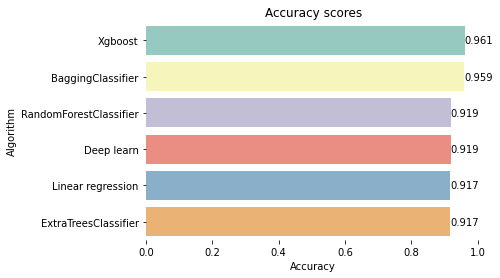

In [51]:
# accuracy
accuracies = [
        np.round(metrics.accuracy_score(val_data_labels, val_data['lr_pred']),3), 
        np.round(metrics.accuracy_score(val_data_labels, val_data['etc_pred']),3), 
        np.round(metrics.accuracy_score(val_data_labels, val_data['rfc_pred']),3), 
        np.round(metrics.accuracy_score(val_data_labels, val_data['bagger_pred']),3), 
        np.round(scores[1],3), 
        np.round(xgboost_accuracy,3)
        ]

# hack to visualize without running everything
#accuracies = [0.917,0.917,0.919,0.959,0.917,0.956]

acc_vis_data = pd.DataFrame({"Accuracies":accuracies,"Algorithm":['Linear regression', 'ExtraTreesClassifier', 'RandomForestClassifier', 'BaggingClassifier', 'Deep learn', 'Xgboost']})

acc_vis_data = acc_vis_data.sort_values(["Accuracies"], ascending=False)

g = sns.barplot("Accuracies","Algorithm",data = acc_vis_data, palette="Set3")
g.set_xlabel("Accuracy")

for container in g.containers:
    g.bar_label(container, label_type='edge')

g = g.set_title("Accuracy scores")
sns.despine(bottom = True, left = True)

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


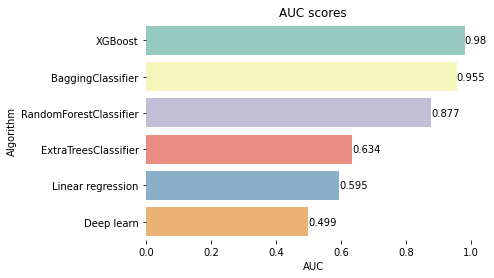

In [52]:
# AUC
AUCs = [
        np.round(metrics.roc_auc_score(val_data_labels, val_data['lr']),3),
        np.round(metrics.roc_auc_score(val_data_labels, val_data['etc']),3),
        np.round(metrics.roc_auc_score(val_data_labels, val_data['rfc']),3),
        np.round(metrics.roc_auc_score(val_data_labels, val_data['bagger']),3),
        np.round(metrics.roc_auc_score(val_data_labels, val_data['deep']),3),
        np.round(metrics.roc_auc_score(val_data_labels, val_data['xgboost']),3),
        ]

# hack to visualize without running everything
#AUCs = [0.595,0.634,0.877,0.955,0.5]

AUCs_vis_data = pd.DataFrame({"AUCs":AUCs,"Algorithm":['Linear regression', 'ExtraTreesClassifier', 'RandomForestClassifier', 'BaggingClassifier', 'Deep learn', 'XGBoost']})

AUCs_vis_data = AUCs_vis_data.sort_values(["AUCs"], ascending=False)

g = sns.barplot("AUCs","Algorithm",data = AUCs_vis_data, palette="Set3")
g.set_xlabel("AUC")

for container in g.containers:
    g.bar_label(container, label_type='edge')

g = g.set_title("AUC scores")
sns.despine(bottom = True, left = True)

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


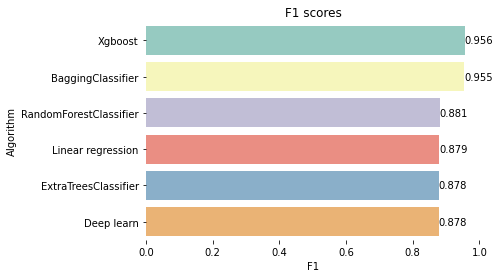

In [53]:
# F1
f1 = [
      np.round(metrics.f1_score(val_data_labels, val_data['lr_pred'] , average='weighted'),3),
      np.round(metrics.f1_score(val_data_labels, val_data['etc_pred'] , average='weighted'),3),
      np.round(metrics.f1_score(val_data_labels, val_data['rfc_pred'] , average='weighted'),3),
      np.round(metrics.f1_score(val_data_labels, val_data['bagger_pred'] , average='weighted'),3),
      np.round(metrics.f1_score(val_data_labels, val_data['deep_pred'] , average='weighted'),3),
      np.round(metrics.f1_score(val_data_labels, val_data['xgboost_pred'] , average='weighted'),3)
      ]

# hack to visualize without running everything
#f1 = [0.879,0.878,0.881,0.955,0.878,0.951]

f1_vis_data = pd.DataFrame({"F1":f1,"Algorithm":['Linear regression', 'ExtraTreesClassifier', 'RandomForestClassifier', 'BaggingClassifier', 'Deep learn', 'Xgboost']})

f1_vis_data = f1_vis_data.sort_values(["F1"], ascending=False)

g = sns.barplot("F1","Algorithm",data = f1_vis_data, palette="Set3")
g.set_xlabel("F1")

for container in g.containers:
    g.bar_label(container, label_type='edge')

g = g.set_title("F1 scores")
sns.despine(bottom = True, left = True)

plt.show()

# Old crap

In [42]:
"""
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

test = result.drop(columns=["Registrikood"])
test = test.fillna(0)

scale= StandardScaler()
scaled_data = scale.fit_transform(test) 

kmeans = KMeans(n_clusters=3, random_state=0).fit(scaled_data)
clusters = kmeans.labels_
count_arr = np.bincount(clusters)
count_arr
"""

'\nfrom sklearn.cluster import KMeans\nfrom sklearn.preprocessing import StandardScaler\n\ntest = result.drop(columns=["Registrikood"])\ntest = test.fillna(0)\n\nscale= StandardScaler()\nscaled_data = scale.fit_transform(test) \n\nkmeans = KMeans(n_clusters=3, random_state=0).fit(scaled_data)\nclusters = kmeans.labels_\ncount_arr = np.bincount(clusters)\ncount_arr\n'

In [43]:
"""
itemindex = np.where(clusters==2)
itemindex
"""

'\nitemindex = np.where(clusters==2)\nitemindex\n'

In [44]:
"""
result.loc[821]
"""

'\nresult.loc[821]\n'